This project leverages the Breast Cancer dataset from Kaggle to build a complete machine learning pipeline for medical diagnosis. It explores and compares various classification algorithms.The goal is to identify the most effective model for early and accurate breast cancer detection.

🔍 Introduction to the Breast Cancer Dataset is one of the most prevalent and life-threatening diseases affecting women worldwide. Early and accurate diagnosis plays a crucial role in improving treatment outcomes and survival rates.This dataset contains features derived from digitized images of fine needle aspirate (FNA) of breast masses. The features describe characteristics of the cell nuclei present in the image, such as texture, radius, perimeter, smoothness, and concavity. Each instance in the dataset is labeled as either benign (non-cancerous) or malignant (cancerous).


🎯 Objective The  main objective of this project is to develop and compare the performance of various supervised machine learning algorithms to accurately classify breast tumors as benign or malignant based on features extracted from digitized images of fine needle aspirate (FNA) of breast masses.
The models include:

a)Logistic Regression
b)Support Vector Machine (SVM)
c)K-Nearest Neighbors (KNN)
d)Naive Bayes
e)Decision Tree
f)Random Forest

📊 Evaluation Metrics We assess the performance of each model using the following metrics:

a)Accuracy
b)Precision
c)Recall
d)F1 Score
e)Confusion Matrix

🎯 Goal of the Project is to build and evaluate multiple machine learning models using the Breast Cancer Wisconsin dataset in order to identify the model that provides the highest accuracy and reliability in classifying tumors as benign or malignant. This can support early detection and better decision-making in breast cancer diagnosis.

<h1>LOGISTIC REGRESSION</h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [5]:
data = pd.read_csv("C:/Users/SUSHMITHA/Desktop/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['diagnosis']=l.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
x = data.iloc[:,2:-1]
y = data.iloc[:,[1]]

In [10]:
print(x.shape)
print(y.shape)

(569, 30)
(569, 1)


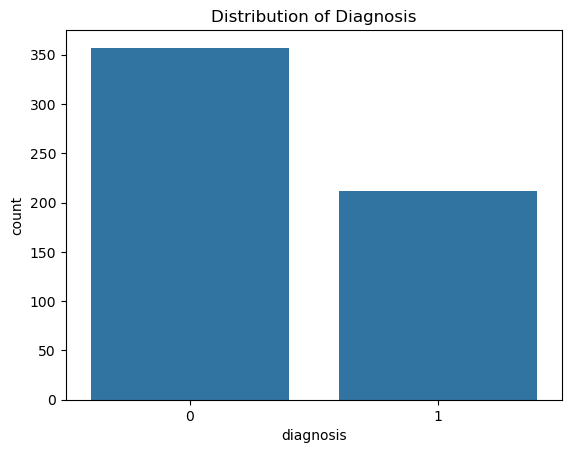

In [11]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

In the above graph '0' indicates person not suffering from cancer

'1' indicates person is suffering from cancer

Less number of people are suffering from cancer

Majority of the people are not suffering from cancer

0 = Benign (non-cancerous tumors)

1 = Malignant (cancerous tumors)

There are more benign cases than malignant cases in the dataset.

Approximately 357 samples are labeled as benign (0).

Around 212 samples are labeled as malignant (1).

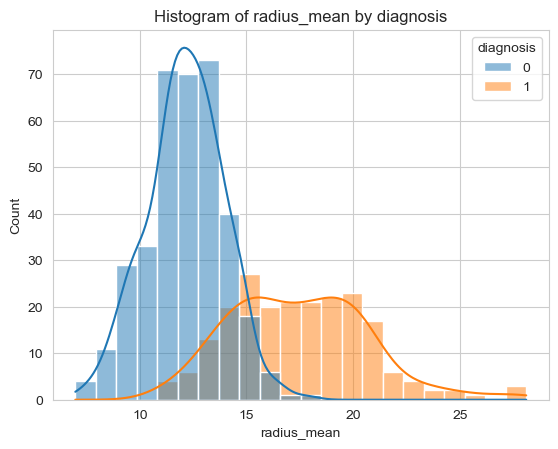

In [12]:
sns.set_style('whitegrid')
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=True)
plt.title("Histogram of radius_mean by diagnosis")
plt.show()

From the above plot, As the radius increases the probability of person having cancer is high

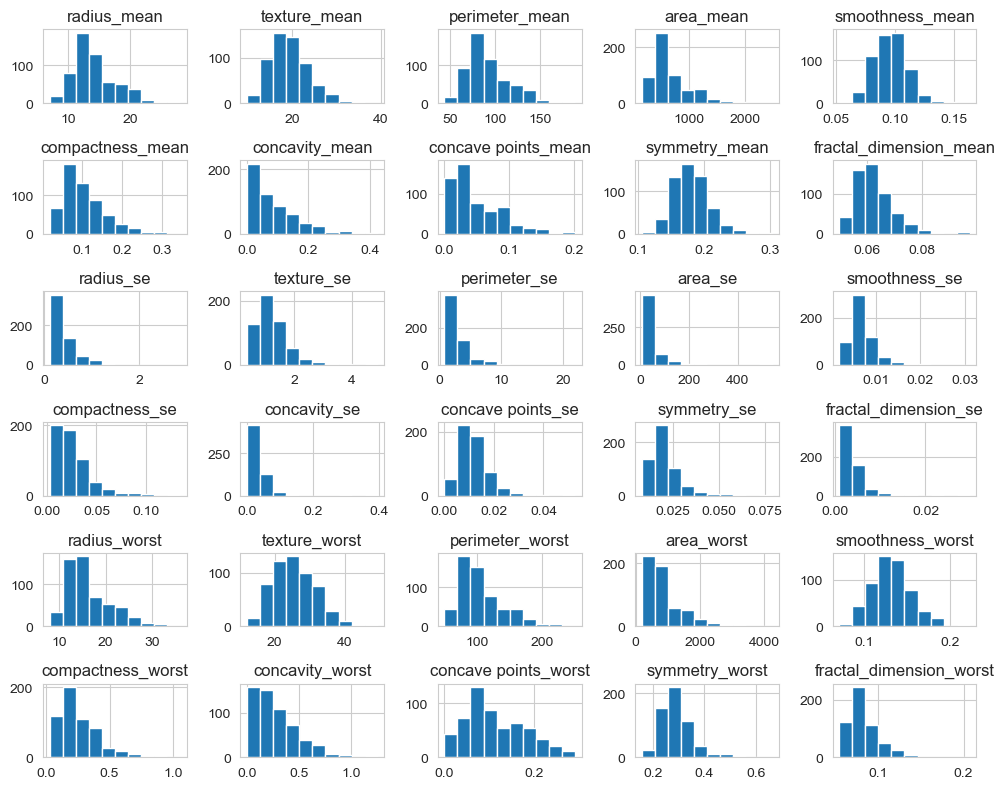

In [13]:
data.iloc[:, 2:-1].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Features: concavity_mean, concave points_mean, etc.Two peaks suggest the presence of two natural subgroups — likely corresponding to benign vs malignant.These features might be highly discriminative in classification.

Features: Some texture- and smoothness-related features like texture_mean, smoothness_mean. have normal distribution

Several features show isolated bars far from the main cluster of values (e.g., area_worst, radius_worst). These may correspond to large or fast-growing tumors, often malignant.

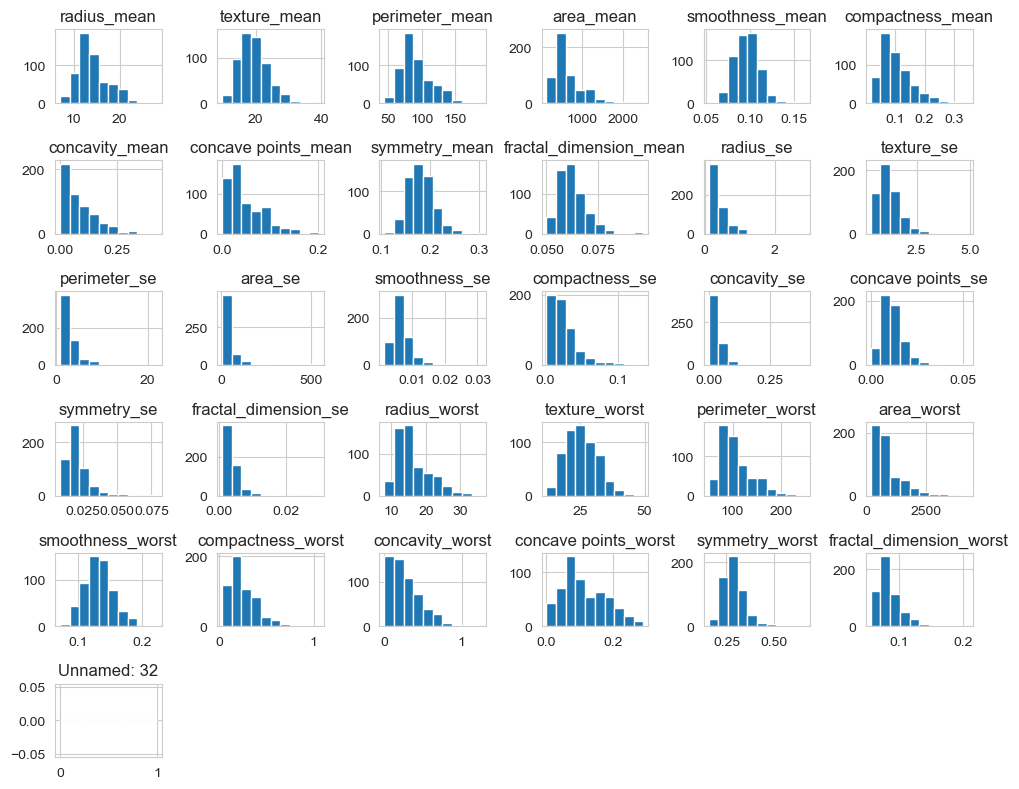

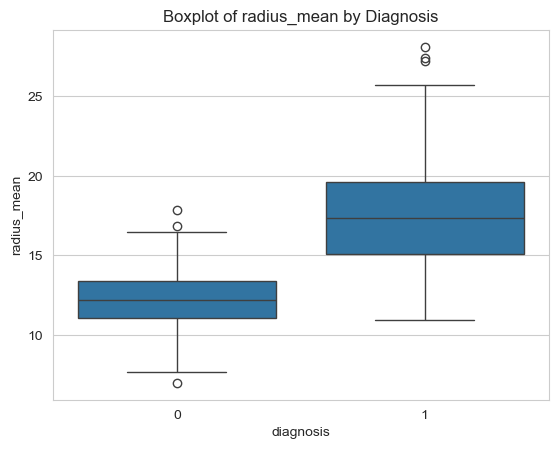

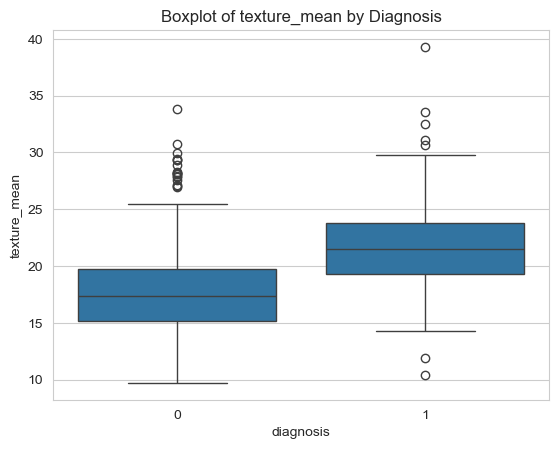

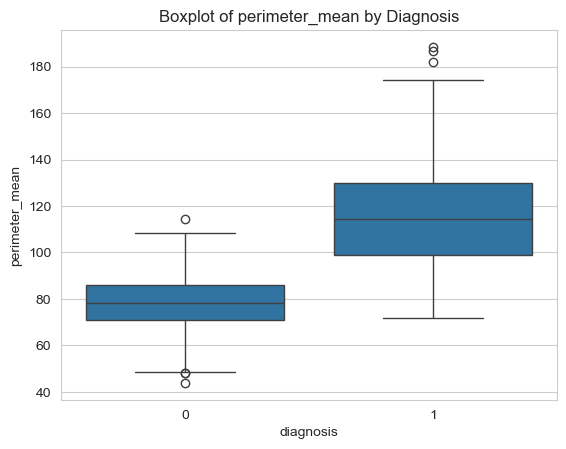

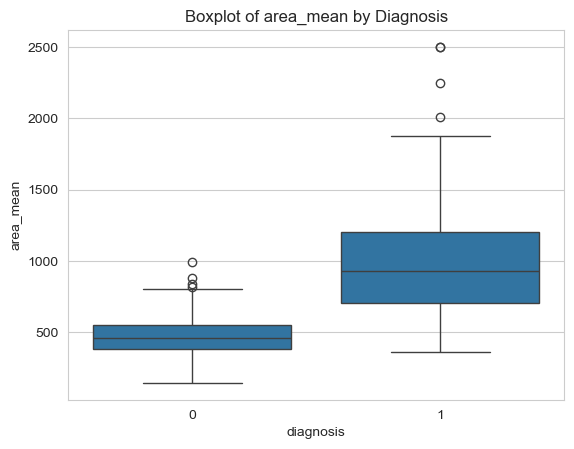

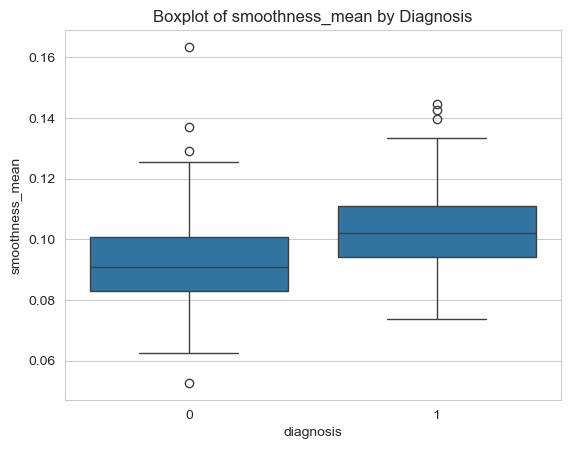

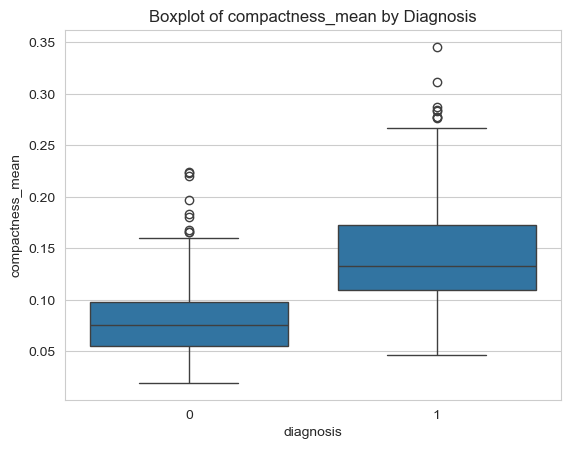

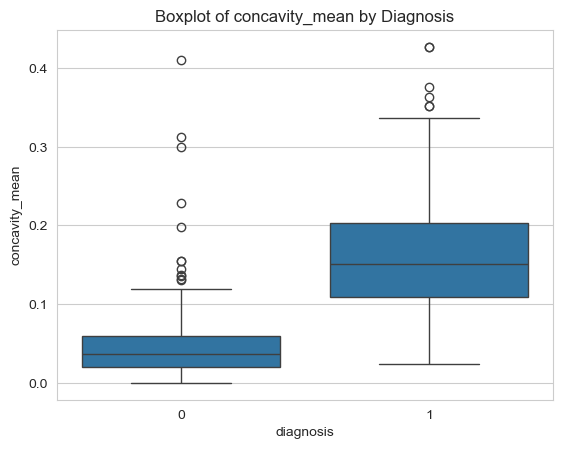

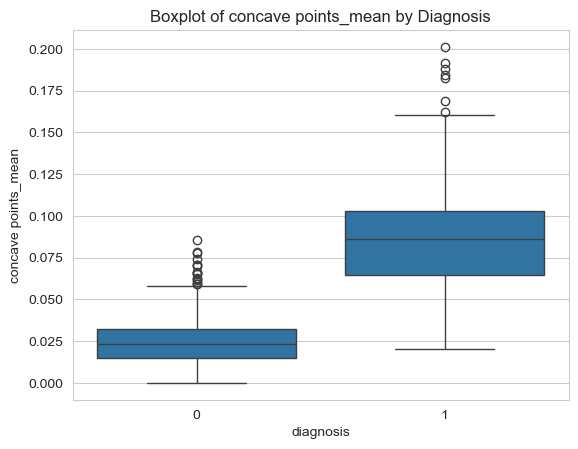

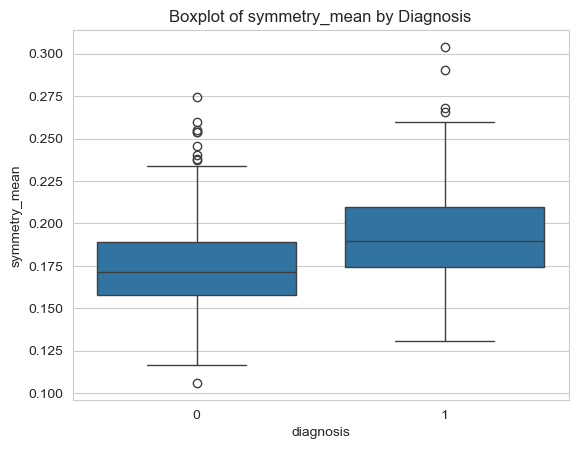

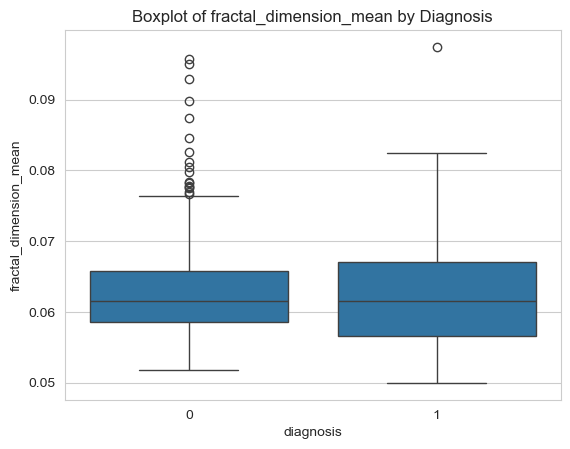

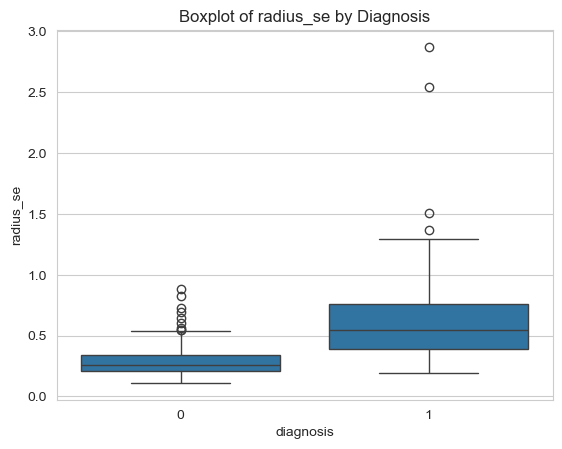

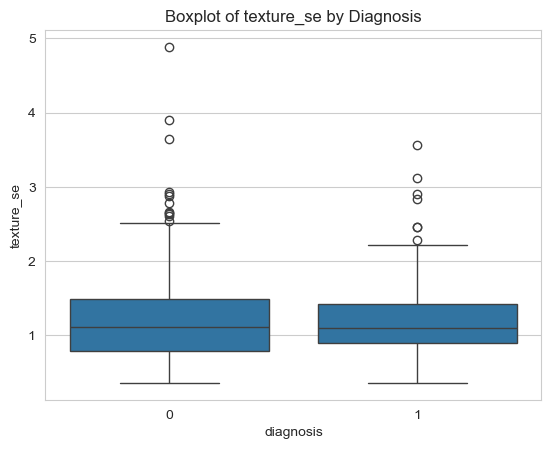

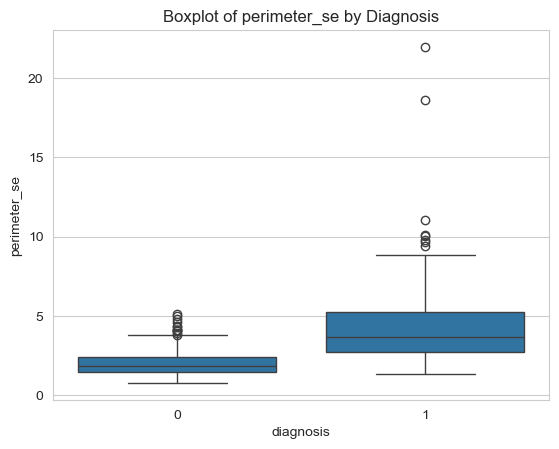

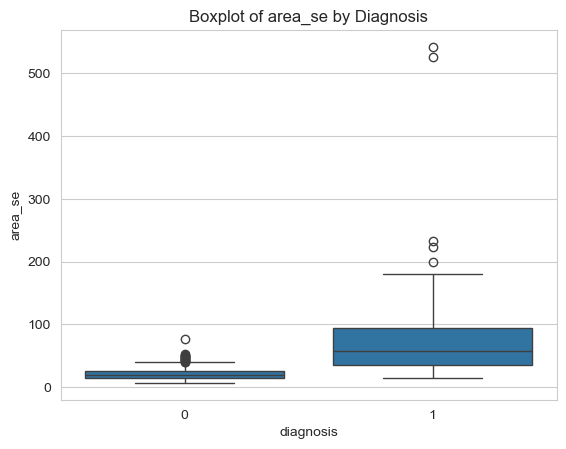

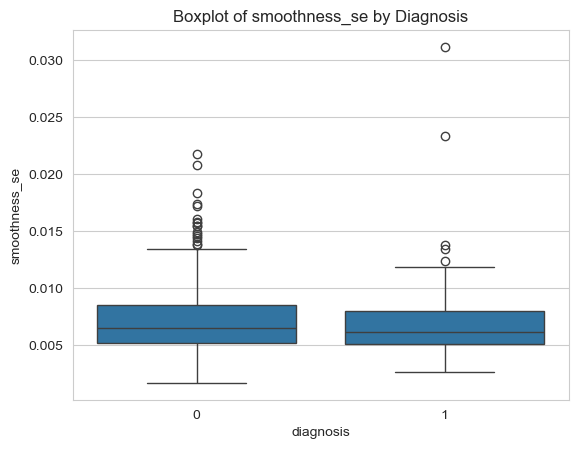

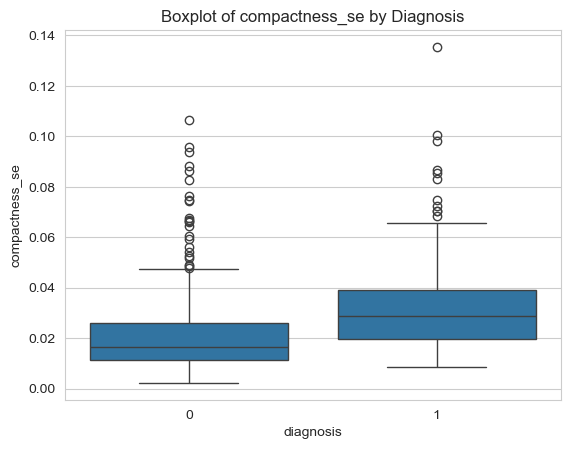

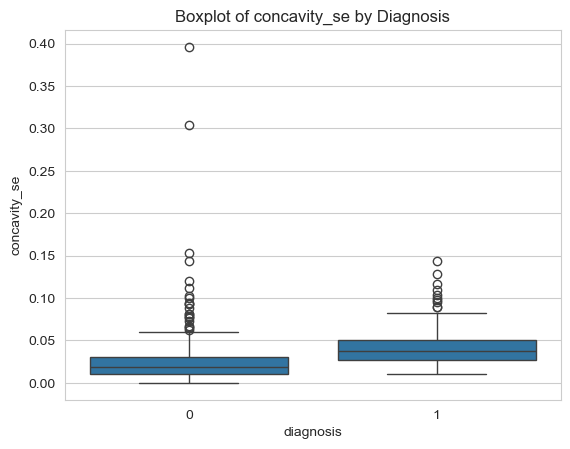

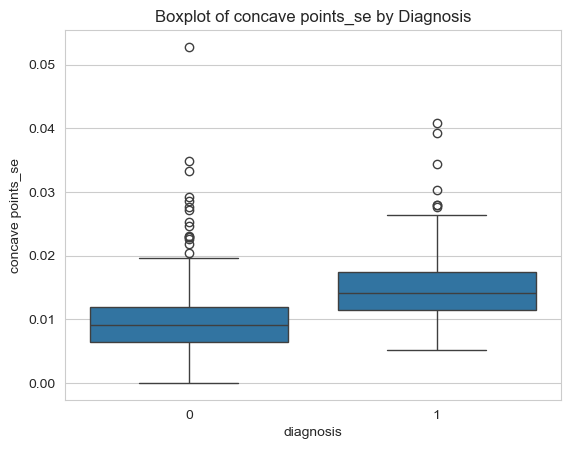

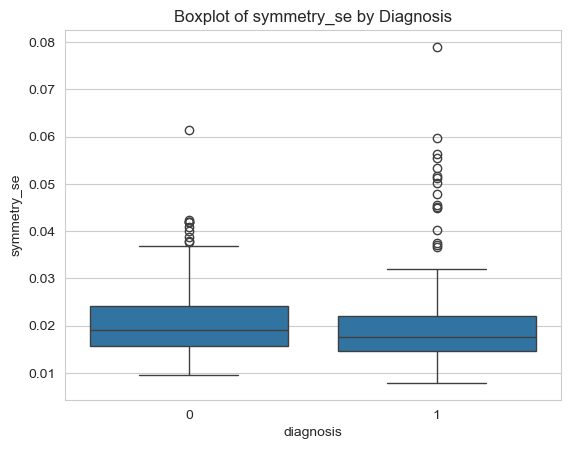

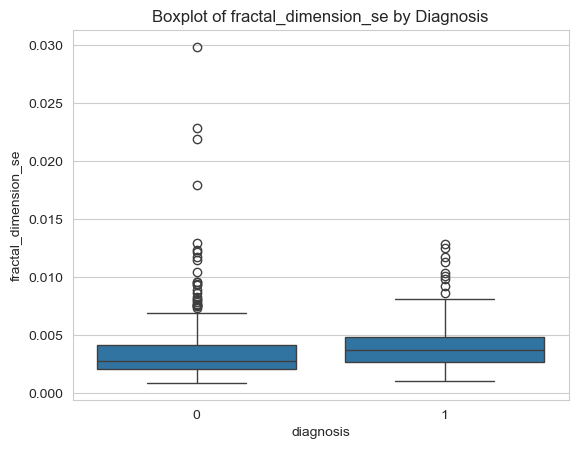

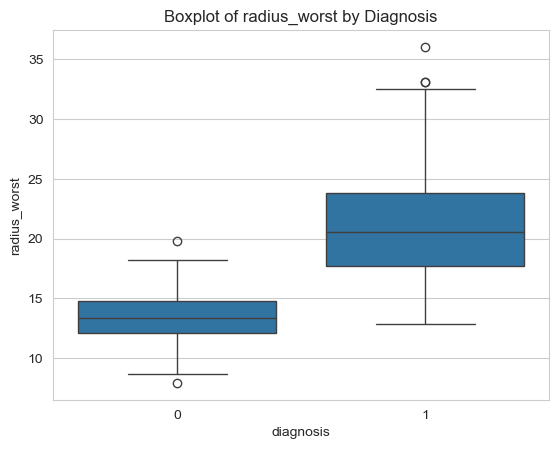

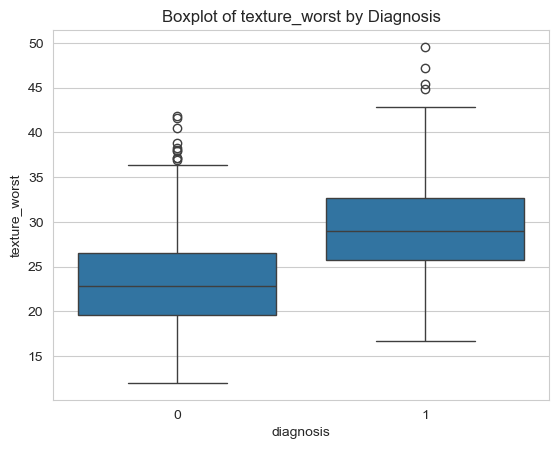

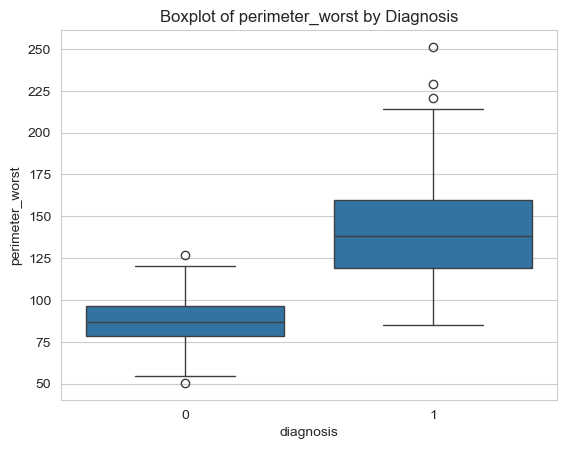

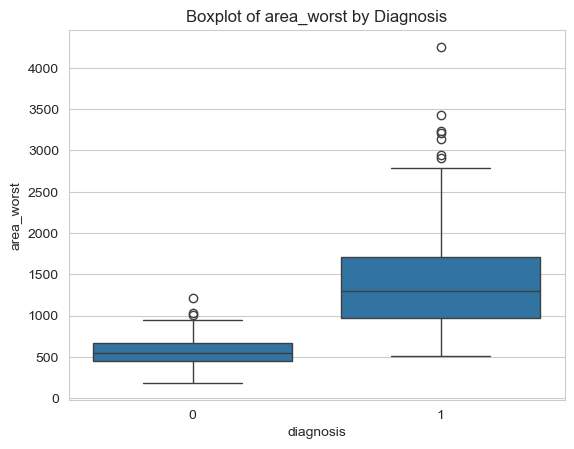

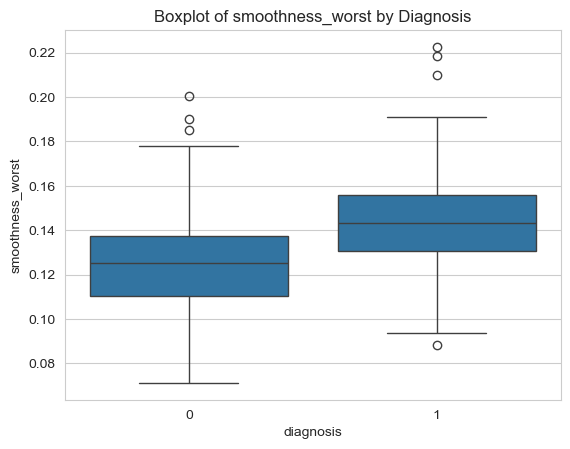

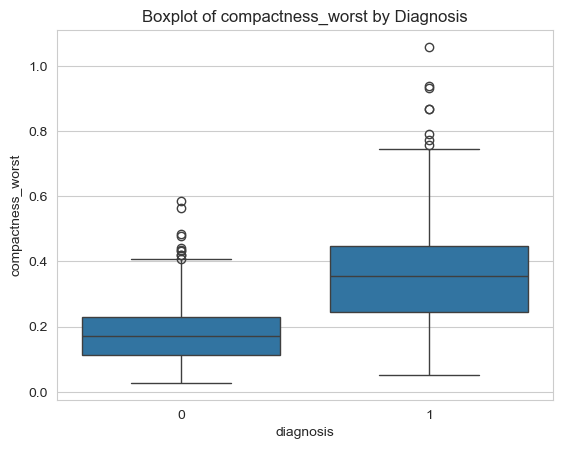

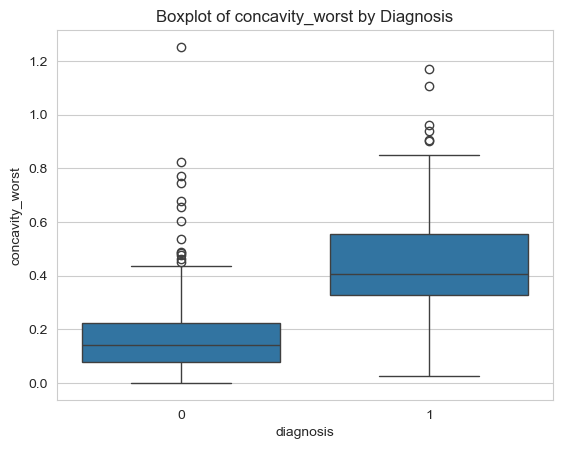

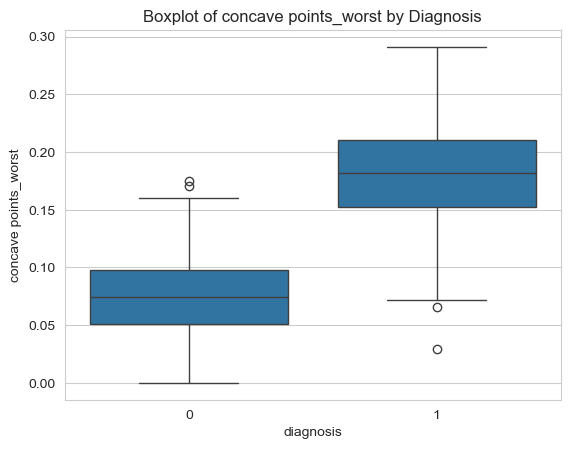

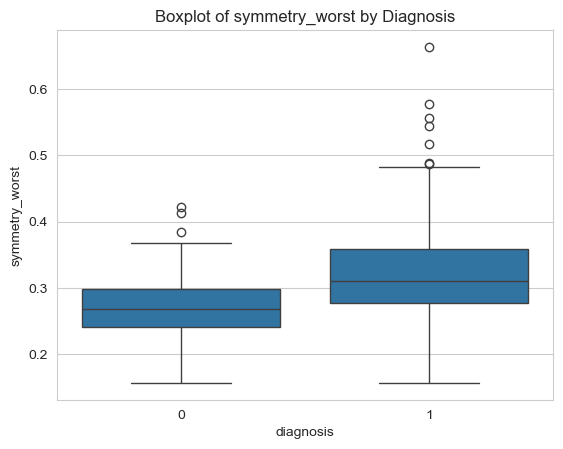

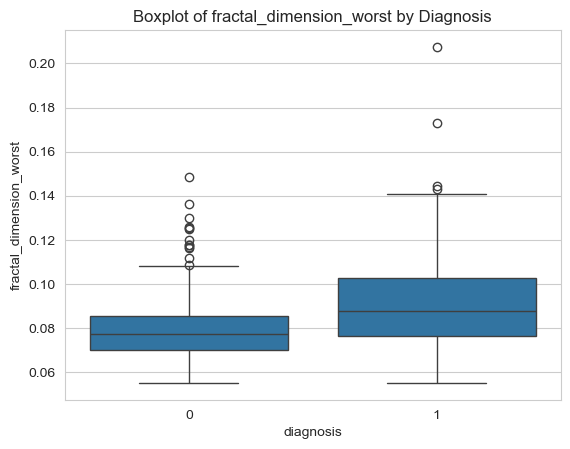

In [14]:
data.iloc[:, 2:].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

for col in data.columns[2:-1]:
    sns.boxplot(x='diagnosis', y=col, data=data)
    plt.title(f'Boxplot of {col} by Diagnosis')
    plt.show()

Some features (especially size-related ones like area_mean, radius_worst) show outliers, particularly in the malignant class.These extreme values may represent aggressive or advanced tumors.
Some features (like smoothness_mean or fractal_dimension_se) may show significant overlap between benign and malignant cases.These features may not be useful on their own for classification but might contribute in combination with others.
Based on visual separation in boxplots, the most discriminative features include:
radius_mean

area_mean

perimeter_mean

concavity_mean

concave points_mean

These could be especially useful in building a classifier.

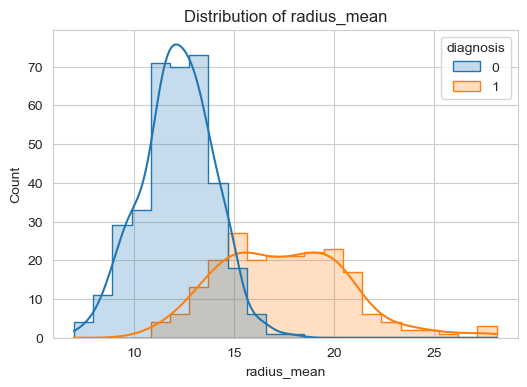

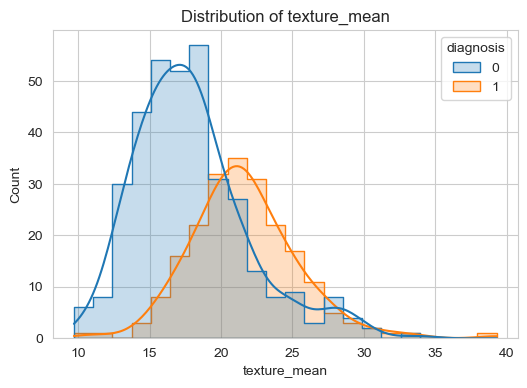

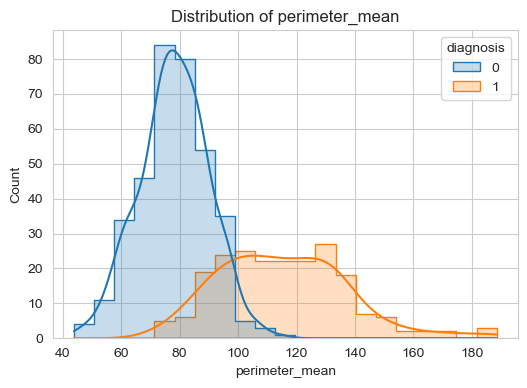

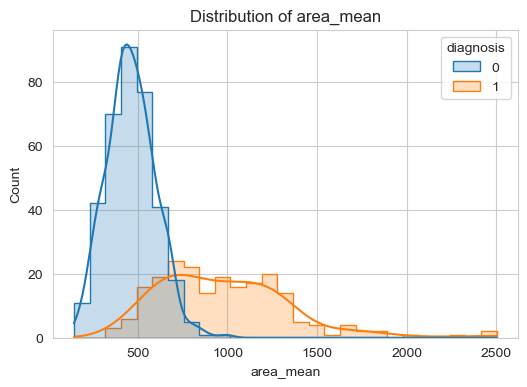

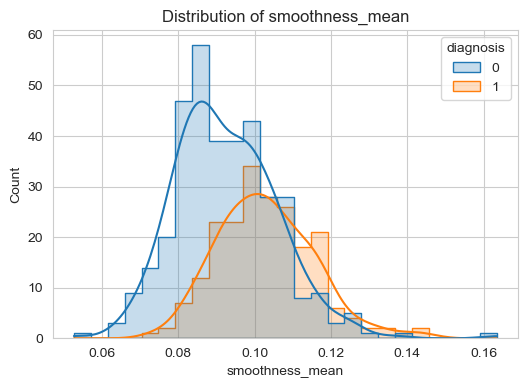

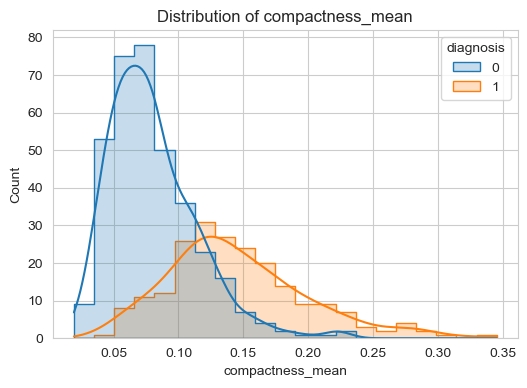

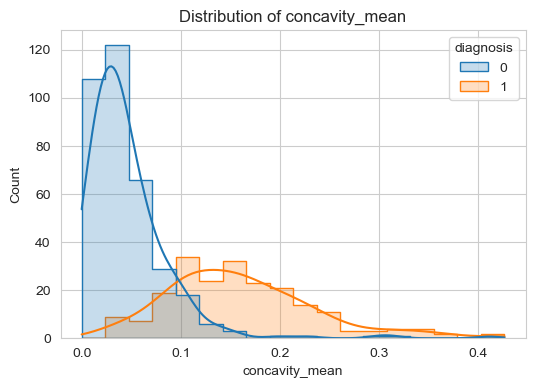

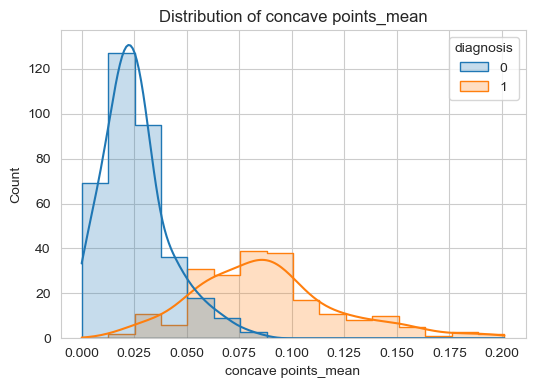

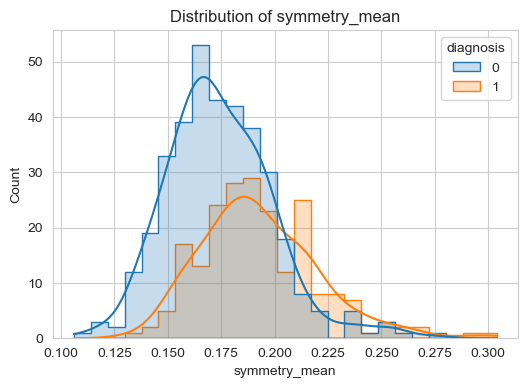

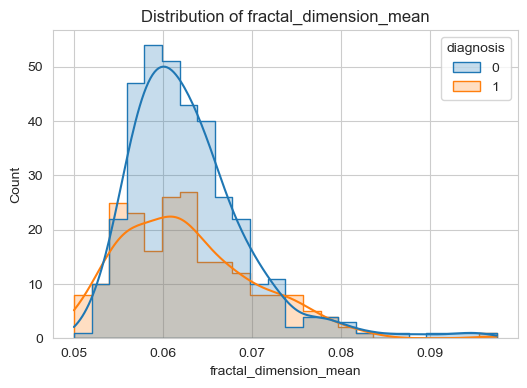

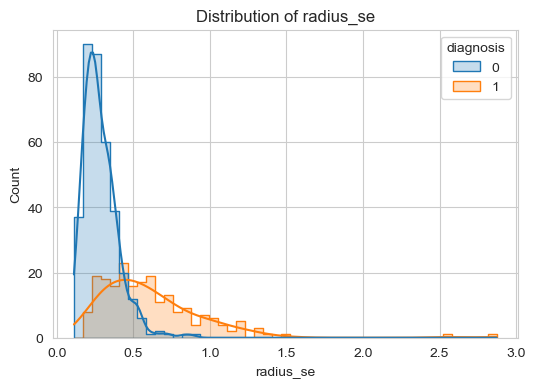

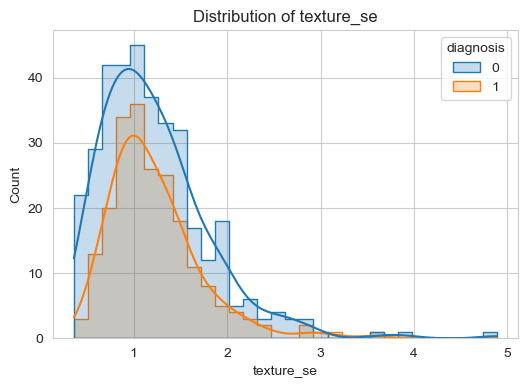

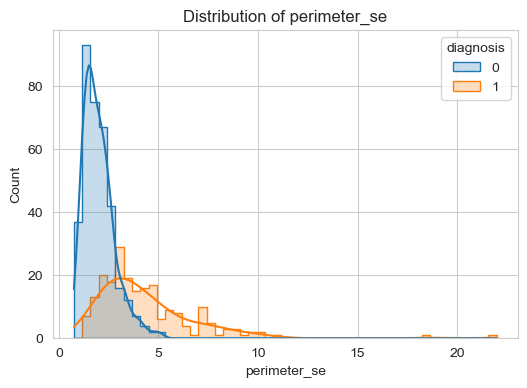

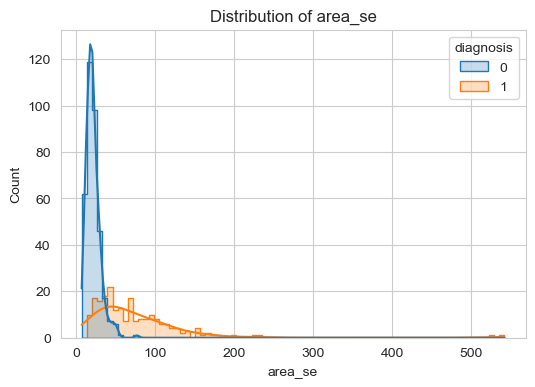

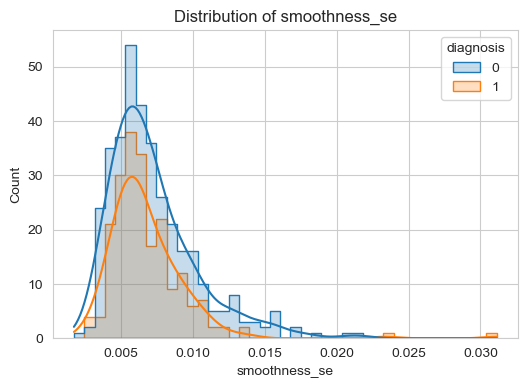

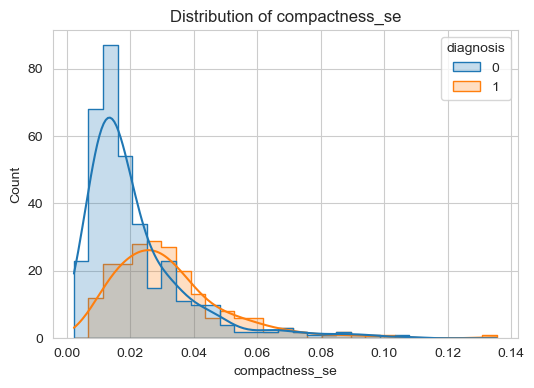

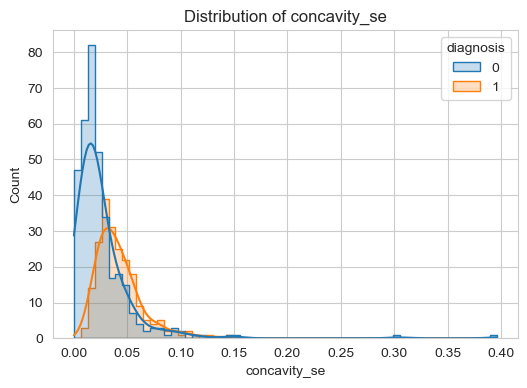

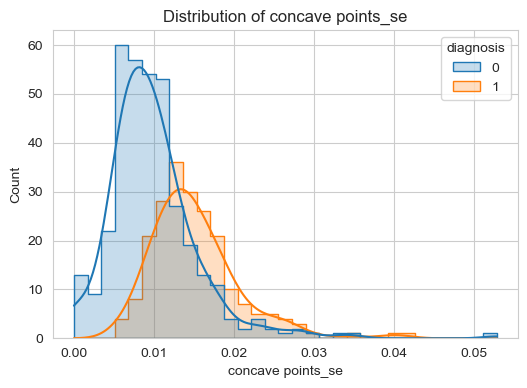

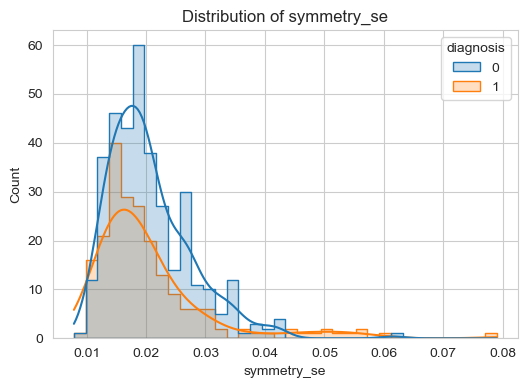

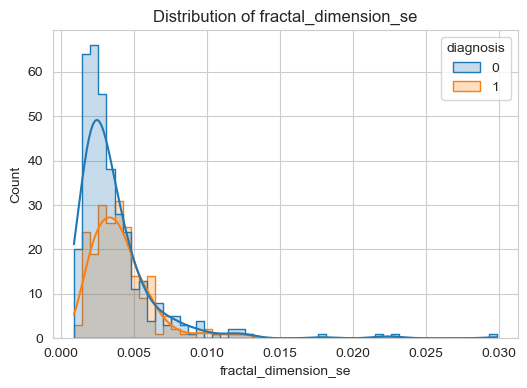

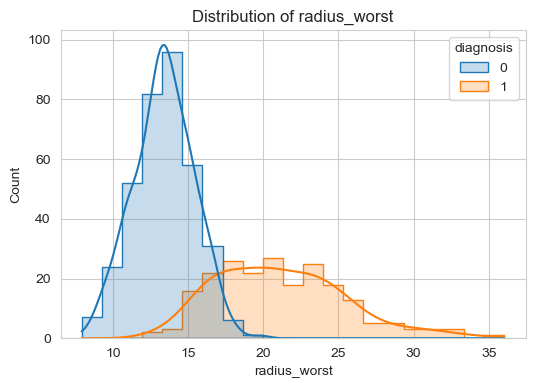

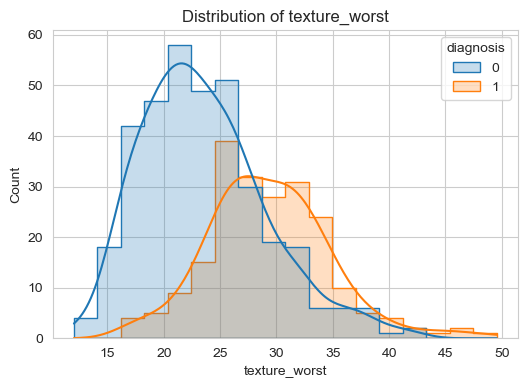

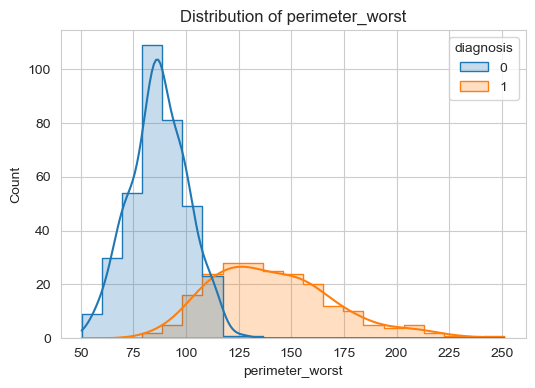

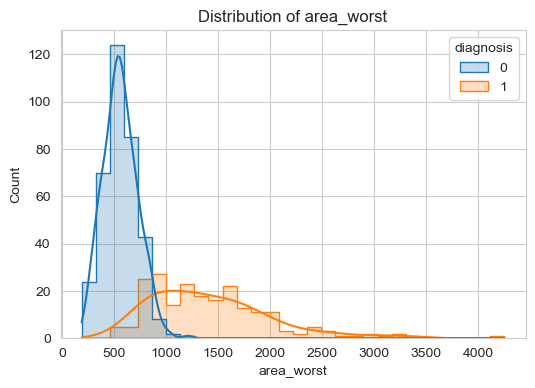

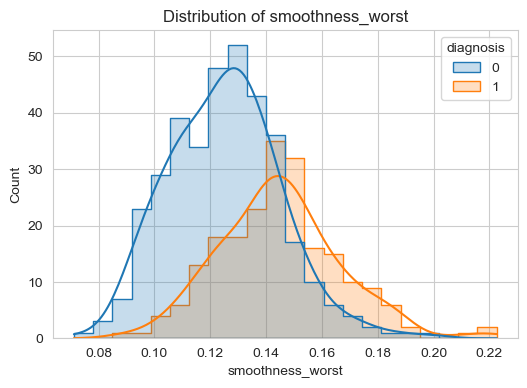

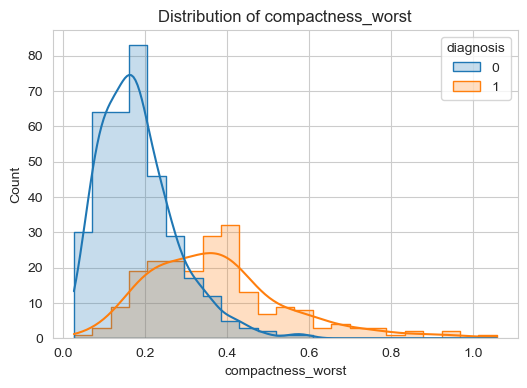

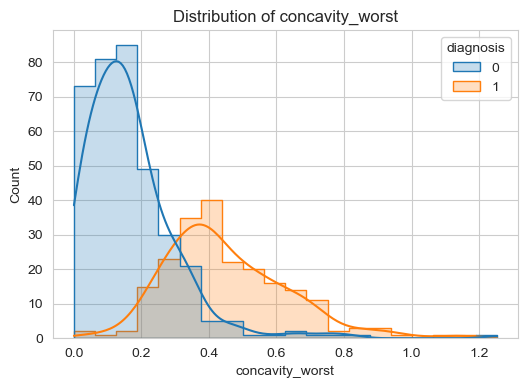

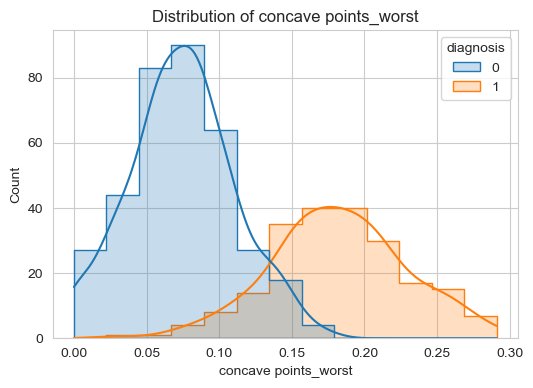

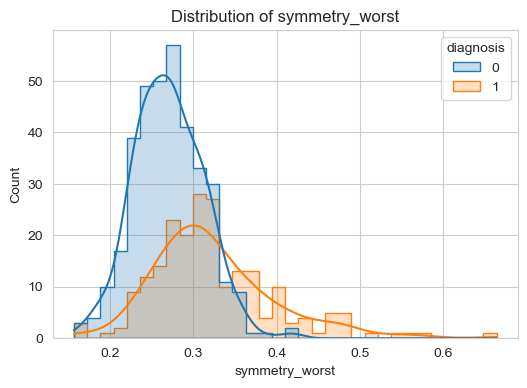

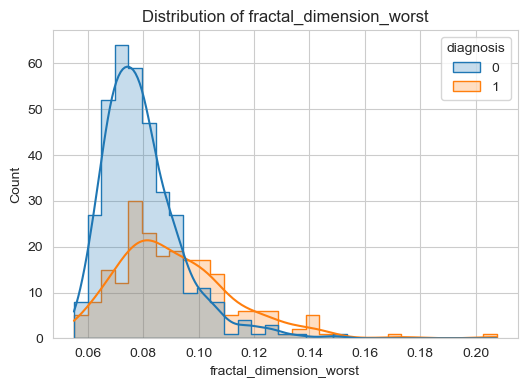

In [15]:
for column in data.columns[2:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data, x=column, hue='diagnosis', kde=True, element='step')  # Replace 'target' with actual column name
    plt.title(f'Distribution of {column}')
    plt.show()

From the above plot, Many features such as area_mean, radius_mean, and perimeter_mean are right-skewed (i.e., long tail to the right). This indicates that most tumors are small/medium-sized, but a few large ones exist.

A right-skewed distribution (also called positively skewed) looks like this: Most of the data values are concentrated on the left side (lower values). The tail stretches out to the right, meaning a few data points have very high values. On a histogram, the peak is on the left and the bars gradually get smaller to the right.

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(x_train, y_train)

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=42)

In [18]:
y_pred = clf.predict(x_test)

In [19]:
log=LogisticRegression(max_iter=10000,random_state=42)
log.fit(x_train,y_train)
log.score(x_train,y_train)

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9626373626373627

In [20]:
y_pred=log.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [21]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.956140
precision_score: 0.975000
recall_score: 0.906977
f1_score: 0.939759
confusion_matrix:
[[70  1]
 [ 4 39]]


<H1>KNN</H1>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [24]:
data = load_breast_cancer()
x = data.data
y = data.target

In [25]:
data  = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
x,y = data.data,data.target
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.2,random_state=42)

In [27]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9230769230769231


In [29]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9649122807017544

In [30]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [31]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.923077
precision_score: 0.919732
recall_score: 0.961538
f1_score: 0.940171
confusion_matrix:
[[145  24]
 [ 11 275]]


<h3>k=3</h3>

In [33]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [34]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.916484
precision_score: 0.910596
recall_score: 0.961538
f1_score: 0.935374
confusion_matrix:
[[142  27]
 [ 11 275]]


<h3>k=4</h3>

In [36]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [37]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.920879
precision_score: 0.928082
recall_score: 0.947552
f1_score: 0.937716
confusion_matrix:
[[148  21]
 [ 15 271]]


In [38]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [39]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc:4f}")
print(f"precision_score: {prec:4f}")
print(f"recall_score: {rec:4f}")
print(f"f1_score: {f1:4f}")
print("confusion_matrix:")
print(cm)

Accuracy: 0.923077
precision_score: 0.919732
recall_score: 0.961538
f1_score: 0.940171
confusion_matrix:
[[145  24]
 [ 11 275]]


<h1>NAIVE BAYES CLASSIFIER</h1>

In [41]:
data = load_breast_cancer()
x = data.data
y = data.target

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)


0.9736842105263158

In [43]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [44]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [45]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [47]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9231
Precision: 0.9373
Recall: 0.9406
F1 Score: 0.9389
Confusion Matrix:
[[151  18]
 [ 17 269]]


<h1>SUPPORT VECTOR MACHINE(SVM)</h1>

In [49]:
from sklearn.svm import SVC
reg = SVC()
reg

SVC()

In [50]:
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9473684210526315

In [51]:
y_pred=reg.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [52]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy: {acc}")
print(f"precision: {prec}")
print(f"recall: {rec}")
print(f"f1_score: {f1}")
print(f"confusion_matrix:")
print(cm)

Accuracy: 0.8923076923076924
precision: 0.8691588785046729
recall: 0.9755244755244755
f1_score: 0.9192751235584844
confusion_matrix:
[[127  42]
 [  7 279]]


<H1>DECISION TREE</H1>

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [55]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [56]:
x,y = data.data,data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [57]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
clf.score(x_train,y_train)

1.0

In [59]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred,average='macro')
rec=recall_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')
cm=confusion_matrix(y_test,y_pred)

print(f" accuracy: {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall: {rec:.4f}")
print(f" F1 Score: {f1:.4f}")
print(cm)

 accuracy: 0.9386
 Precision: 0.9331
 Recall: 0.9369
 F1 Score: 0.9349
[[40  3]
 [ 4 67]]


<H1>RANDOM FOREST</H1>

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
clf.score(x_train,y_train)

1.0

In [64]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [65]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9386
Precision: 0.9571
Recall: 0.9437
F1 Score: 0.9504
Confusion Matrix:
[[40  3]
 [ 4 67]]


C:\Users\SUSHMITHA\AppData\Local\Temp\ipykernel_20380\1317248267.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


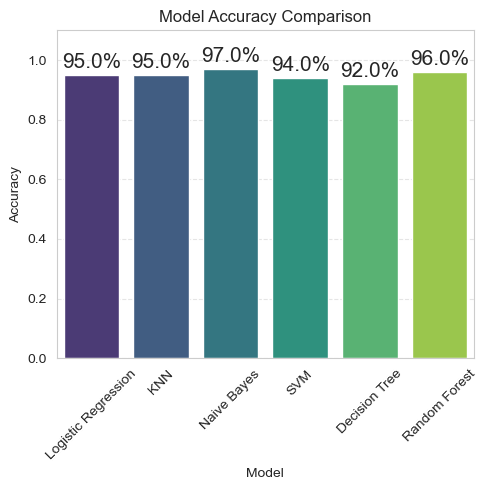

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.95, 0.95, 0.97, 0.94, 0.92, 0.96]
}

df = pd.DataFrame(d)


plt.figure(figsize=(5, 5))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=15
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The bar plot will display the accuracy of each model on the test data, allowing you to easily compare their performances.

Based on the dataset and models, you will likely see that Naive Bayes and Random Forest tend to perform well, while SVM and Decision Tree might have slightly lower accuracy.